In [12]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import os

In [13]:
def read_namelist(relative_path):
    """
    Read a Fortran namelist file and extract parameters from a relative path.

    Parameters:
    relative_path (str): Relative path to the namelist file from the notebook.

    Returns:
    dict: Dictionary of parameters read from the file.
    """
    # Construct the full path using the notebook's directory
    notebook_dir = os.getcwd()  # Gets the directory of the current script
    file_path = os.path.join(notebook_dir, relative_path)  # Constructs the full path

    params = {}
    try:
        with open(file_path, 'r') as file:
            for line in file:
                line = line.strip()
                if line.startswith('&') or line.startswith('/'):
                    continue
                key_value = line.split('=')
                if len(key_value) == 2:
                    key = key_value[0].strip()
                    value = key_value[1].strip().rstrip('/')
                    # Convert numerical values from strings
                    if value.isdigit():
                        value = int(value)
                    else:
                        try:
                            value = float(value)
                        except ValueError:
                            pass  # Keep as string if it's not a number
                    params[key] = value
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' does not exist.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

    return params

In [23]:
def read_weights(file_path):
    """
    Reads a text file containing object data and returns an array of weights (masses).
    
    Parameters:
    file_path (str): Path to the input text file.
    
    Returns:
    numpy.ndarray: Array of weights (masses).
    """
    try:
        # Read the file and skip the last line (header comment)
        data = np.genfromtxt(file_path, comments='#')
        
        # Extract the masses (first column)
        weights = data[:, 0]
        
        return weights
    except Exception as e:
        print(f"An error occurred: {e}")
        return None
    
def relativ_weights(weights):

    # Normalize the weights
    total_mass = np.max(weights)
    return weights / total_mass



In [31]:
def read_netcdf(filename):
    try:
         # Open the NetCDF file
        dataset = nc.Dataset(filename, 'r')

        # Read the positions variable
        positions = dataset.variables['positions'][:]

        # Get the dimensions
        xyz, object,  iter = positions.shape
        print(f"Read {object} objects with {xyz} coordinates and {iter} iterations")

        return positions
    except Exception as e:
        print(f"An error occurred: {e}")

def plot_positions(positions, weights):
    # Get the dimensions
    # print(positions.shape)
    xyz, object, iter = positions.shape

    # Create a figure
    fig = plt.figure()
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the positions
    for i in range(object):
        print(f"Plotting object {i}")
        x = positions[0, i, :]
        y = positions[1, i, :]
        z = positions[2, i, :]
        ax.plot(x, y, z, label=f'Object {i}')

    # Plot the last position of each object
    for i in range(object):
        x = positions[0, i, -1]
        y = positions[1, i, -1]
        z = positions[2, i, -1]
        ax.plot(x, y, z,  marker='o', markersize=weights[i]*10, color='red')

    # Set the labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.set_title('Object positions')
    ax.legend()

    # Show the plot
    plt.show()


In [42]:
relative_path = '../../data/namelist/settings.nml'
parameters = read_namelist(relative_path)
print(parameters)
# Example usage
file_path = '../../data/objects/multiyObj_test.txt'
weights = read_weights(file_path)
print(weights)

rel_weights = relativ_weights(weights)
print(rel_weights)


{'n_max': 4, 'dt': 0.001, 'nsteps': 10000, 'outfile': '"data/pos.nc"', 'objectfile': '"data/objects/multiyObj_test.txt"'}
[1.e+11 1.e+11 1.e+11 1.e+11]
[1. 1. 1. 1.]


Read 3 objects with 4 coordinates and 10000 iterations
(3, 4, 10000)
Plotting object 0
Plotting object 1
Plotting object 2
Plotting object 3


<Figure size 640x480 with 0 Axes>

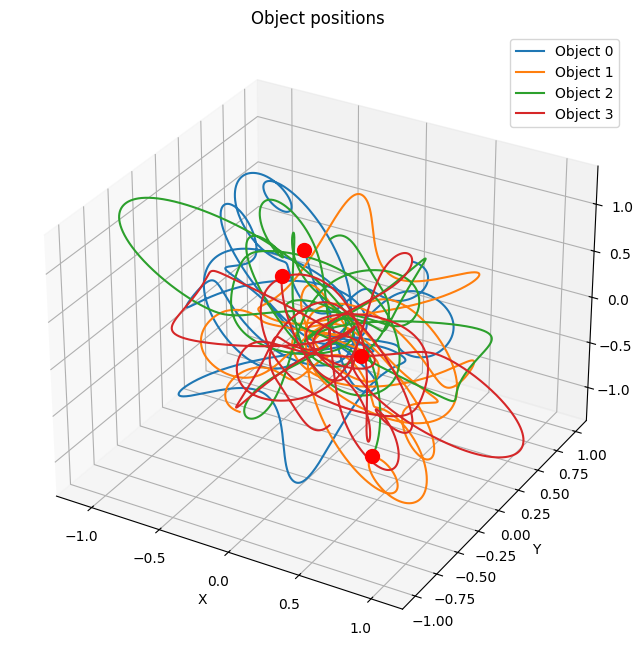

In [43]:
#execute fotran
#!/home/fillies/Documents/Uni_Projects/3_Body_system/shell_scripts/main.sh

# Example usage
filename = '/home/fillies/Documents/Uni_Projects/3_Body_system/data/pos.nc'
positions = read_netcdf(filename)

#print(positions)
#print(positions.shape)

if positions is not None:
    plot_positions(positions, rel_weights)

Read 3 objects with 2 coordinates and 10000 iterations
(3, 2, 10000)
Plotting object 0
Plotting object 1


<Figure size 640x480 with 0 Axes>

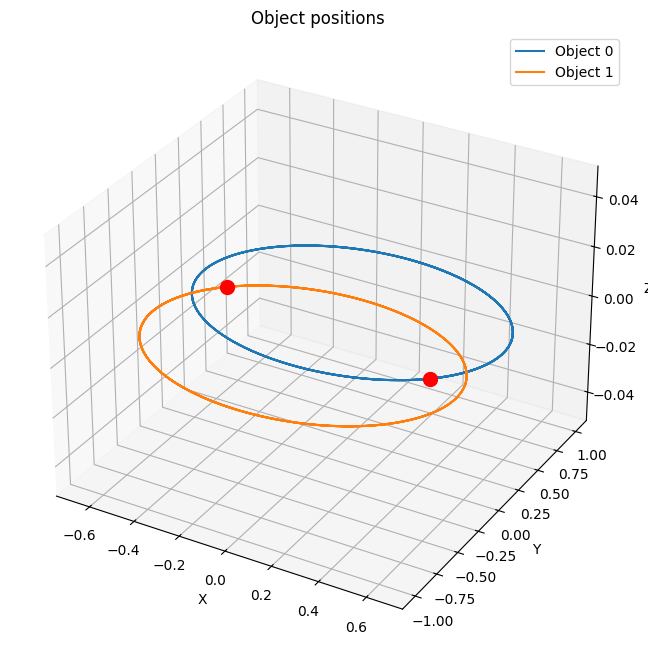

In [46]:
#execute fotran
#!/home/fillies/Documents/Uni_Projects/3_Body_system/shell_scripts/main.sh

# Example usage
filename = '/home/fillies/Documents/Uni_Projects/3_Body_system/data/1big_1small.nc'
positions = read_netcdf(filename)

#print(positions)
#print(positions.shape)

if positions is not None:
    plot_positions(positions, rel_weights)